<a href="https://colab.research.google.com/github/ai-dolaeva/Sentiment_analysis/blob/main/PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Соединение с диском, для загрузки данных*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
cd drive/MyDrive/'Учебная практика'/


*Класс, реализующий предварительную подготовку данных: удаление стоп-слов,  токанизация*

In [ ]:
import nltk.classify.util
import pandas as pd
import re
import pickle
from tokenize import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


class cleanDataclass :

  
    negation_words = ['none',
                      'doesnt',
                      'nonetheless',
                      'not',
                      'non',
                      'nobody',
                      "no",
                      "without",
                      "never",
                      "neither",
                      "nor",
                      "non",
                      'but',
                      "nothing",
                      "noone",
                      "other"]

    stop_words = stopwords.words('english')
    for w in stop_words:
        if w in negation_words:
            stop_words.remove(w)
    stop_words.append('am')
    stop_words.append('i')
    stop_words.append('pm')
    stop_words.append('tonight')
    stop_words.append('tomorrow')
    stop_words.append('today')
    stop_words.append('soon')
    stop_words.append('yesterday')
    stop_words.append('week')
    stop_words.append('day')
    stop_words.append('morning')
    stop_words.append('evening')
    stop_words.append('yayayayayaay')
    stop_words.append('tasha')
    stop_words.append('sunday')
    stop_words.append('monday')
    stop_words.append('tuesday')
    stop_words.append('wednesday')
    stop_words.append('thursday')
    stop_words.append('friday')
    stop_words.append('saturday')
    stop_words.append('weekend')

    CONTRACTION_MAP = {
        "omg": "oh my god",
        "wtf": "what the fuck",
        "gonna": "going to",
        "gotta":"got",
        "k": "okay",
        "ok": "okay",
        "ain't": "is not",
        "aren't": "are not",
        "can't": "can not",
        "cant": "can not",
        "can't've": "can not have",
        "cause": "because",
        "cuz": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "didnt": "did not",
        "doesn't": "does not",
        "doesnt": "does not",
        "don't": "do not",
        "dont": "do not",
        "hadn't": "had not",
        "hadnt": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "hasnt": "has not",
        "haven't": "have not",
        "havent": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "im": "i am",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "ive": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "lol": "laugh out loud",
        "ma'am": "madam",
        "maam": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "nope" :'no',
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "thx": "thank",
        "thanx": "thank",
        "thanks": "thank",
        "u": "you",
        "wasn't": "was not",
        "wasn": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "y": "why",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
        "ya": 'yes',
        "fucker": "fuck",
        "fuckin": "fuck",
        "fucking": "fuck"
    }

    def clean (self,text):
        text = text.lower()
        text = ' '.join([self.CONTRACTION_MAP.get(item, item) for item in text.split()])
        text = re.sub(r"(?:\@|https?\://)\S+", "URL", text)
        text = re.sub(r"\#\S+", "HASHTAG", text)
        text = re.sub(r'\@\S+', "USER", text)
        text = re.sub(r'(.)\1{2,}', r'\1', text)
        text = re.sub("[^a-zA-Z]", " ", text)
        words = text.split()
        words = [w for w in words if not w in self.stop_words]
        return (words)

    def get_sentenses(self, df): 
      dfsentences = []
      for text in df:
        raw_sentences = tokenizer.tokenize(text.strip())
        sentences =[] 
        for raw_sentence in raw_sentences:
          
          if len(self.clean(raw_sentence)) > 0:
              sent = self.clean(raw_sentence)
              if len(sent) > 0:
                sentences.append(sent)
        dfsentences += sentences
      return  dfsentences
       

In [ ]:
# from google.colab import files
# files.upload()  для загрузки библиотек

*Библиотеки*

In [4]:
import pandas as pd
from gensim.models import word2vec
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import logging
import numpy as np
import nltk.data
# import cleandataclass as cdc

*Обучающий датасет* (100972)  из открытых источников с добавлением около 1000 твитов, связанной тематики


In [ ]:
trainPath = "./train/train_data.csv"
train = pd.read_csv(trainPath, encoding="latin1", header=0, error_bad_lines=False, delimiter=",")
train

*Обработка данных*

In [ ]:
clean = cleanDataclass()
sentences = clean.get_sentenses(train["SentimentText"])

In [ ]:
clean = cleanDataclass()
clean_train_texts = []
for text in train["SentimentText"]:
    clean_train_texts.append(clean.clean(text))

In [ ]:
train["SentimentText"][:10]

In [ ]:
clean_train_texts[:10]

Обучение модели по заданным параметрам

In [ ]:
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# model = word2vec.Word2Vec(sentences, 
#                           workers=10,# распараллеливание вычислений для ускорения
#                           size=300, # размер словарного вектора
#                           min_count=40, # обрезание слов, встречающихся реже заданного числа
#                           window=10, # контекст 10 слова слева и справа
#                           sample= 1e-3, # порог для понижения высокочастотных слов
#                           sg = 1, # skram , 0 - cbow
#                           seed=1 # начальный номер последовательности генерации случайных чисел. одинаковость
#                           )

# model.init_sims(replace=True)
model_name = "300size_10window"
# model.save(model_name)

model = word2vec.Word2Vec.load(model_name)

In [ ]:
def makeFeatureVec(words, model):
    featureVec = np.zeros((model.vector_size,), dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
    featureVec = np.divide(featureVec, nwords)
    return featureVec

def getAvgFeatureVecs(texts, model):
    counter = 0.
    textFeatureVecs = np.zeros((len(texts), model.vector_size), dtype="float32")
    for text in texts:
        textFeatureVecs[int(counter)] = makeFeatureVec(text, model)
        counter = counter + 1.
    return textFeatureVecs

*Генерация Word2vec-признаков*

In [ ]:
def featurize_w2v(model, sentences):
  f = np.zeros((len(sentences), model.vector_size))
  for i,s in enumerate(sentences): #Циклически просматривает каждое предложение, добавляет векторы для каждого слова и берет среднее
    for w in s:

      try:
        vec = model[w]
      except KeyError:
        continue
      f[i,:] = f[i,:] + vec
    f[i,:] = f[i,:] / len(s)
  return f

In [ ]:
# trainDataVecs = featurize_w2v(model, clean_train_texts)
trainDataVecs = getAvgFeatureVecs(clean_train_texts, model)

обрабатывать недостающие данные в наборе данных прогнозирующей модели. nan - mean


In [ ]:
trainDataVecs = SimpleImputer().fit_transform(trainDataVecs)

*Тестовые данные, для которых будет определяться тональность*

In [ ]:
testPath = "./test/vaccine.csv"
test = pd.read_csv(testPath, encoding="latin1", header=0, error_bad_lines=False, delimiter=",")
test =  test.drop(columns=['id', 'permalink', 'username'])
test.shape

In [ ]:
clean_train_texts = []
for text in test["text"]:
    clean_train_texts.append(clean.clean(text))

In [ ]:
# testDataVecs = featurize_w2v(model, clean_train_texts)
testDataVecs = getAvgFeatureVecs(clean_train_texts, model)

In [ ]:

testDataVecs = SimpleImputer().fit_transform(testDataVecs)

*Построение модели на базе алгоритма «случайный лес» и word2vec-признаков*

In [ ]:
forest = Pipeline([("scale", StandardScaler()),
                   ("forest", RandomForestClassifier(n_estimators=100))])


# features_w2v = featurize_w2v(model, sentences)
# model4 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# model4.fit(features_w2v, d_train.sentiment)
# test_sentences = tokenize(d_test.review)
# test_features_w2v = featurize_w2v(model, test_sentences)
# pred4 = model4.predict_proba(test_features_w2v)
# performance(d_test.sentiment, pred4, color="c")

In [ ]:
forest = forest.fit(trainDataVecs, train["Sentiment"])

*Предсказание тональности*

In [ ]:
result = forest.predict(testDataVecs)

In [ ]:
output = pd.DataFrame(data={"id": test["date"], "sentiment": result})
output[:10]

In [ ]:
output.to_csv("./Result_vaccine.csv", index=False, quoting=3)

In [ ]:
output = pd.read_csv("./Result_vaccine.csv")
output

*Средняя величина тональнасти за месяц*

In [ ]:
import datetime
start_time  = output["id"].min()
start_time = [int(item) for item in start_time.split("-")]
start_time= datetime.date(start_time[0], start_time[1], start_time[2])

last_time  = output["id"].max()
last_time = [int(item) for item in last_time.split("-")]
last_time= datetime.date(last_time[0], last_time[1], last_time[2])

means =[]

while start_time< last_time:
  means.append(output[(output['id']>str(start_time)) & (output['id']<str(start_time+datetime.timedelta(days=90)))].mean())
  start_time+=datetime.timedelta(days=90)

In [ ]:
means = pd.DataFrame(means)
means

n= len(means)
ar =pd.DataFrame([i for i in range(n)])
ar

means.to_csv("./Res_vaccine_month.csv", index=False, quoting=3)


*Построение графиков*

In [180]:
data_pe= pd.read_csv("./pe/Disney.csv", header=0, error_bad_lines=False, delimiter=",")
print(data_pe.shape)

data_sent= pd.read_csv("./result/Res_disney_month.csv", header=0, error_bad_lines=False, delimiter=",")
print(data_sent.shape)


(57, 4)
(57, 1)


In [133]:
# import plotly.graph_objs as go
# import plotly.express as px
trace1 =go.Scatter(x=data_pe["Date"], y=data_pe['PE'], name='pe')
trace2 = go.Scatter(x=data_pe["Date"], y=data_sent['sentiment'], name='sentiment', yaxis='y2')
data = [trace1, trace2]
layout = go.Layout( 
    title='Amazon Sentiment and P/E',
     yaxis=dict( title='pe',zeroline=True, showline=True ),
      yaxis2=dict(title='sentiment', zeroline=True, showline=True, overlaying='y', side='right' )
 )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [181]:
def calculate_slope(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)

def get_params(x, y):
    a = calculate_slope(x, y)
    b = y.mean() - a * x.mean()
    return a, b

x = data_sent['sentiment'][:57].fillna(0)
y = data_pe['PE'].fillna(0)

a, b = get_params(x.to_numpy(), y.to_numpy())
print(a, b)
 

7.885088912954319 8.09843560752472


In [182]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_test = x_test[:, np.newaxis]
x_train = x_train[:, np.newaxis]

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)


from sklearn.metrics import r2_score

r2= r2_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [183]:
# import scipy

cor =[]

r, p= stats.pearsonr(x.to_numpy(), y.to_numpy())
cor.append(r)
y = data_pe['Price'].fillna(0)
r, p= stats.pearsonr(x.to_numpy(), y.to_numpy())
cor.append(r)
y = data_pe['EPS'].fillna(0)
r, p= stats.pearsonr(x.to_numpy(), y.to_numpy())
cor.append(r)
cor

[0.046463244454797735, -0.5676129066301634, -0.2584091646451099]

In [149]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_sent['sentiment'], y = a*data_sent['sentiment']+b, mode='lines+markers',  name='y=%sx%s'%(a,b)))
fig.add_trace(go.Scatter(x=data_sent['sentiment'],y=data_pe["PE"], mode='markers', name='R2=%s'%r2))
fig.update_layout(
     title='Линейная регрессия',
      yaxis=dict( title='pe',zeroline=True, showline=True ),
xaxis=dict(title='sentiment', zeroline=True, showline=True),
    legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  # margin=dict(l=0, r=0, t=20, b=0)
                  )

fig.show()



In [170]:
trace1 =go.Scatter(x=data_pe["Date"], y=data_pe['PE'], name='pe')
trace2 = go.Scatter(x=data_pe["Date"], y=data_sent['sentiment'], name='sentiment', yaxis='y2')
data = [trace1, trace2]
layout = go.Layout( 
    title='Microsoft Sentiment and P/E',
     yaxis=dict( title='pe',zeroline=True, showline=True ),
      yaxis2=dict(title='sentiment', zeroline=True, showline=True, overlaying='y', side='right' )
 )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [171]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_sent['sentiment'], y = a*data_sent['sentiment']+b, mode='lines+markers',  name='y=%sx%s'%(a,b)))
fig.add_trace(go.Scatter(x=data_sent['sentiment'],y=data_pe["PE"], mode='markers', name='R2=%s'%r2))
fig.update_layout(
     title='Линейная регрессия',
      yaxis=dict( title='pe',zeroline=True, showline=True ),
xaxis=dict(title='sentiment', zeroline=True, showline=True),
    legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  # margin=dict(l=0, r=0, t=20, b=0)
                  )

fig.show()

In [174]:
trace1 =go.Scatter(x=data_pe["Date"], y=data_pe['PE'], name='pe')
trace2 = go.Scatter(x=data_pe["Date"], y=data_sent['sentiment'], name='sentiment', yaxis='y2')
data = [trace1, trace2]
layout = go.Layout( 
    title='Netflix Sentiment and P/E',
     yaxis=dict( title='pe',zeroline=True, showline=True ),
      yaxis2=dict(title='sentiment', zeroline=True, showline=True, overlaying='y', side='right' )
 )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [178]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_sent['sentiment'], y = a*data_sent['sentiment']+b, mode='lines+markers',  name='y=%sx%s'%(a,b)))
fig.add_trace(go.Scatter(x=data_sent['sentiment'],y=data_pe["PE"], mode='markers', name='R2=%s'%r2))
fig.update_layout(
     title='Линейная регрессия',
      yaxis=dict( title='pe',zeroline=True, showline=True ),
xaxis=dict(title='sentiment', zeroline=True, showline=True),
    legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  # margin=dict(l=0, r=0, t=20, b=0)
                  )

fig.show()

In [184]:
trace1 =go.Scatter(x=data_pe["Date"], y=data_pe['PE'], name='pe')
trace2 = go.Scatter(x=data_pe["Date"], y=data_sent['sentiment'], name='sentiment', yaxis='y2')
data = [trace1, trace2]
layout = go.Layout( 
    title='Disney Sentiment and P/E',
     yaxis=dict( title='pe',zeroline=True, showline=True ),
      yaxis2=dict(title='sentiment', zeroline=True, showline=True, overlaying='y', side='right' )
 )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [185]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_sent['sentiment'], y = a*data_sent['sentiment']+b, mode='lines+markers',  name='y=%sx%s'%(a,b)))
fig.add_trace(go.Scatter(x=data_sent['sentiment'],y=data_pe["PE"], mode='markers', name='R2=%s'%r2))
fig.update_layout(
     title='Линейная регрессия',
      yaxis=dict( title='pe',zeroline=True, showline=True ),
xaxis=dict(title='sentiment', zeroline=True, showline=True),
    legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  # margin=dict(l=0, r=0, t=20, b=0)
                  )

fig.show()

In [198]:
# df= pd.DataFrame(cor)
# df['disney'] = pd.DataFrame(cor)
# df.index = ['PE', 'Price', 'EPS']

df

,amazon,microsoft,netflix,disney
PE,0.103661,-0.252848,-0.114578,0.046463
Price,-0.522422,-0.550366,-0.329145,-0.567613
EPS,-0.685070,-0.551893,-0.266534,-0.258409


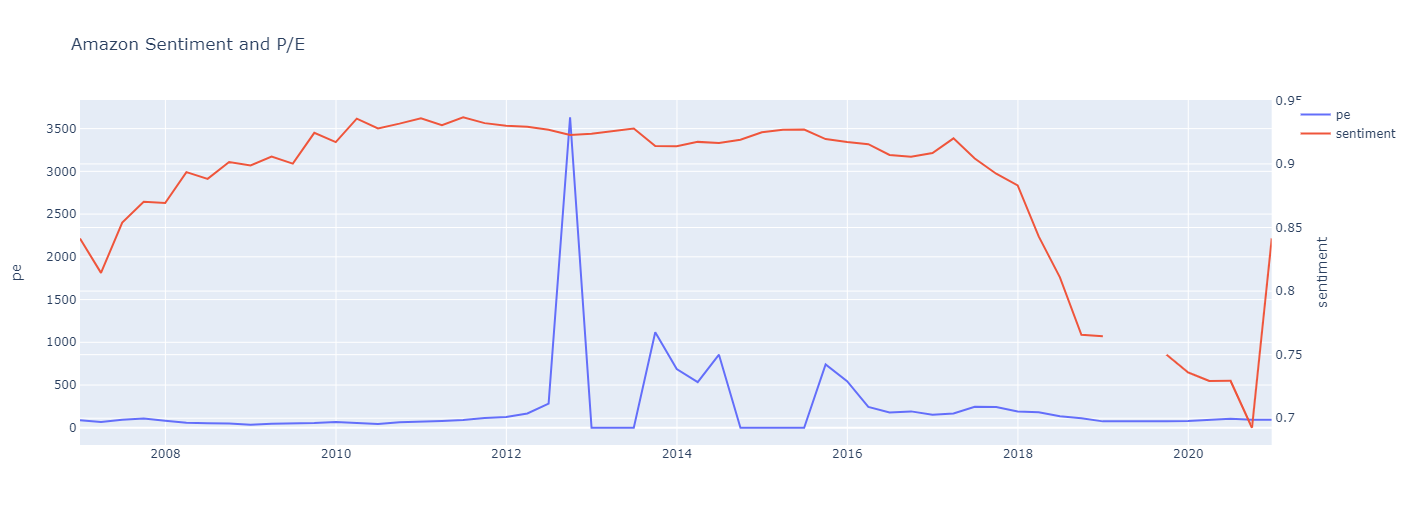

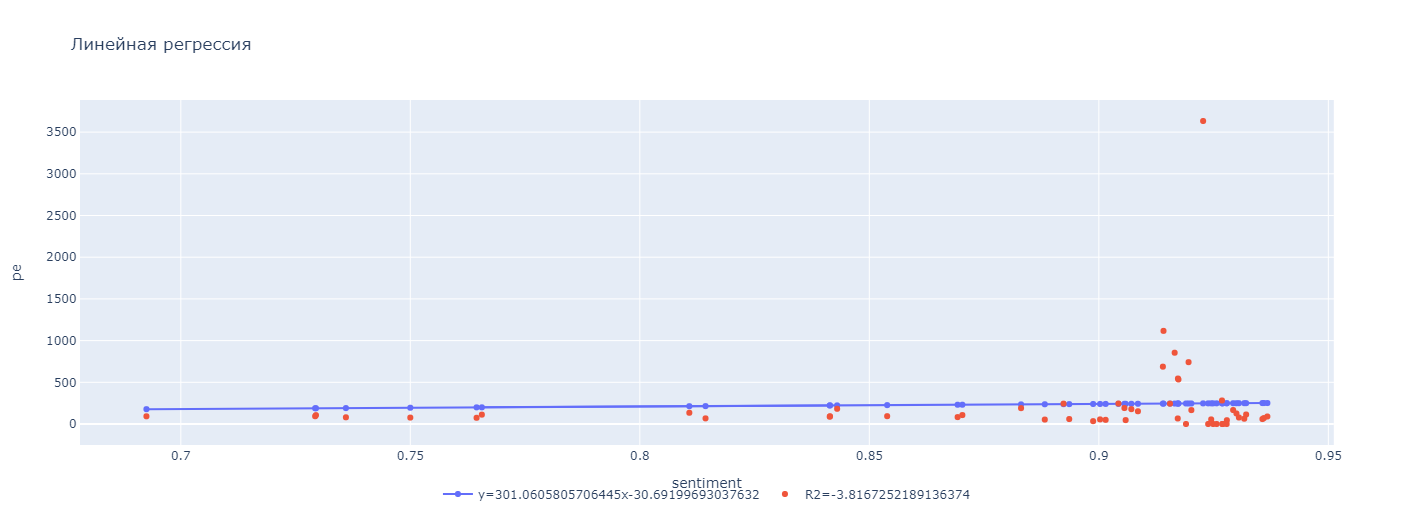

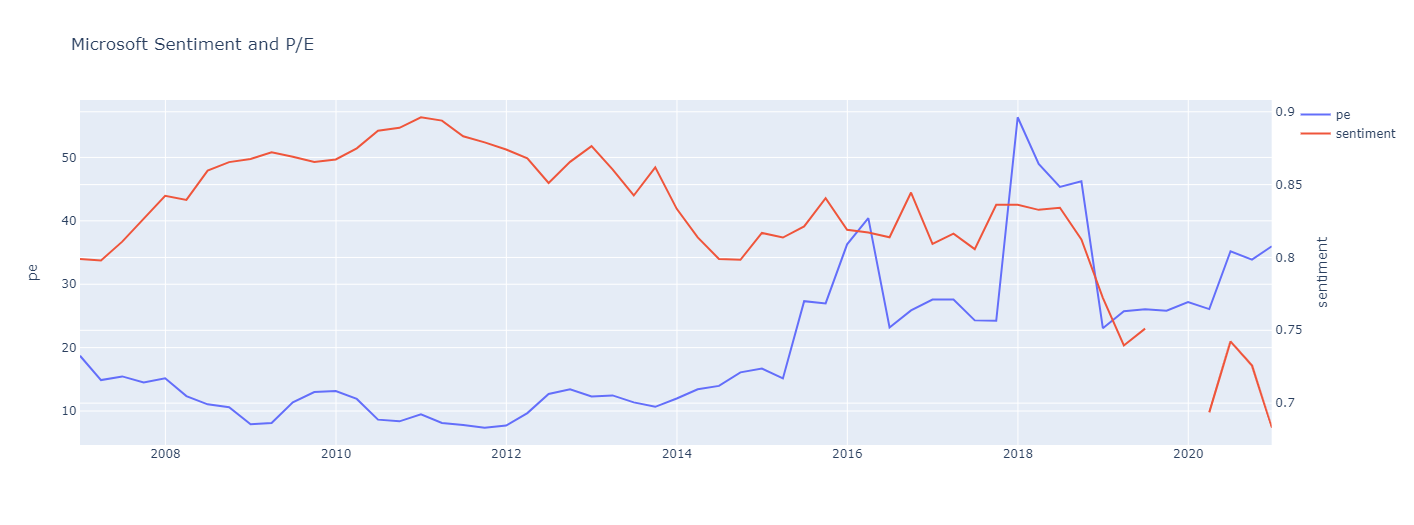

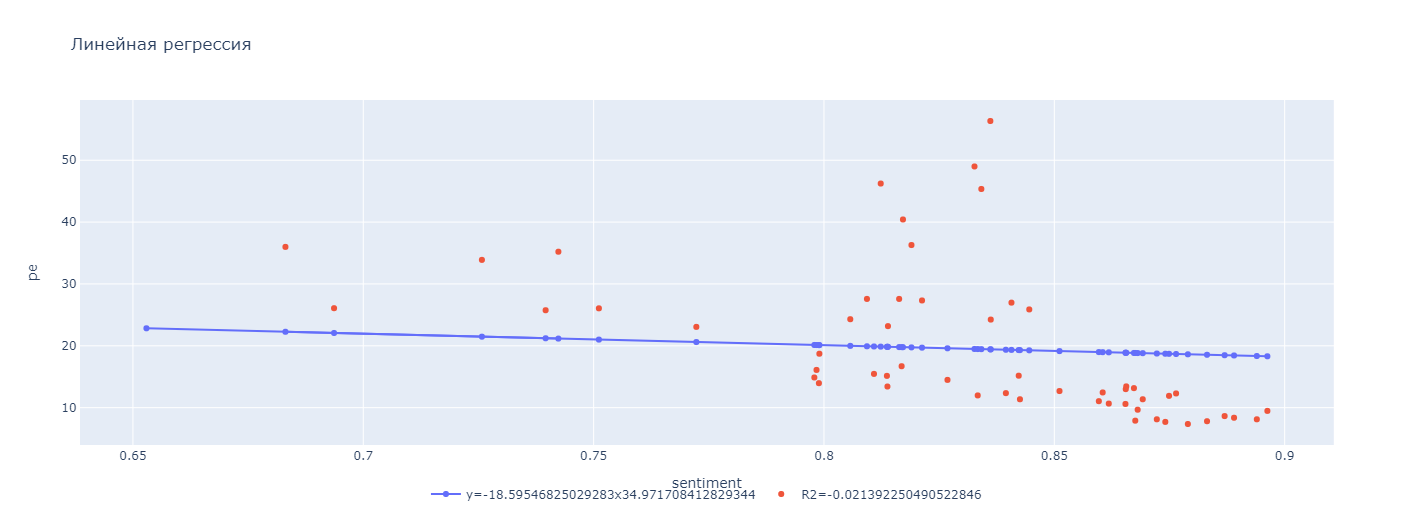

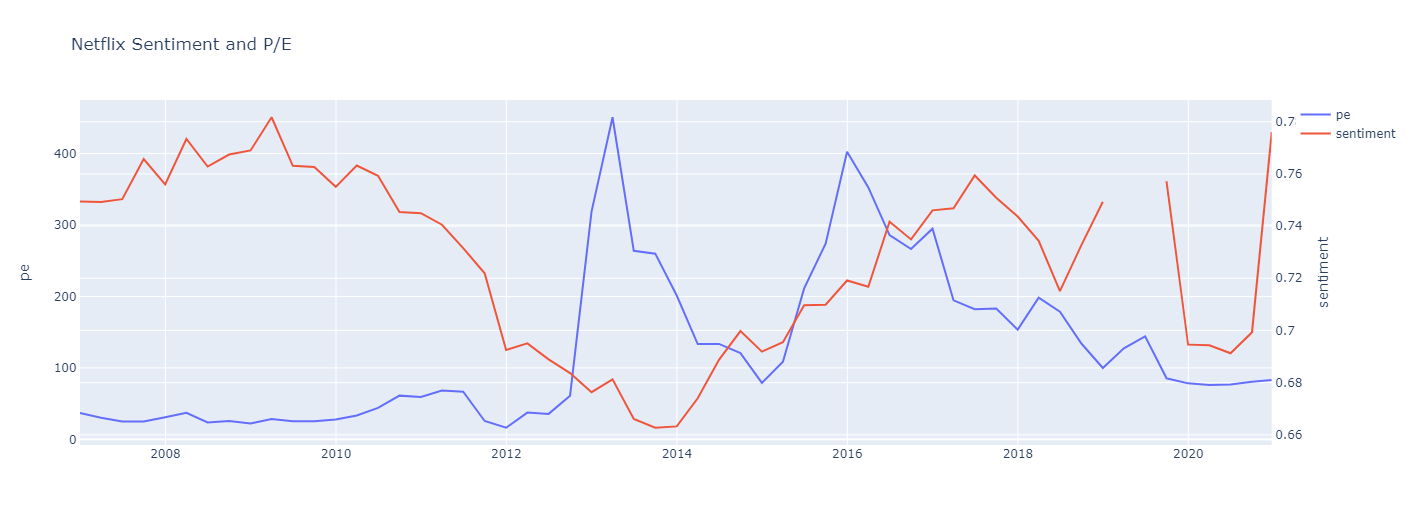

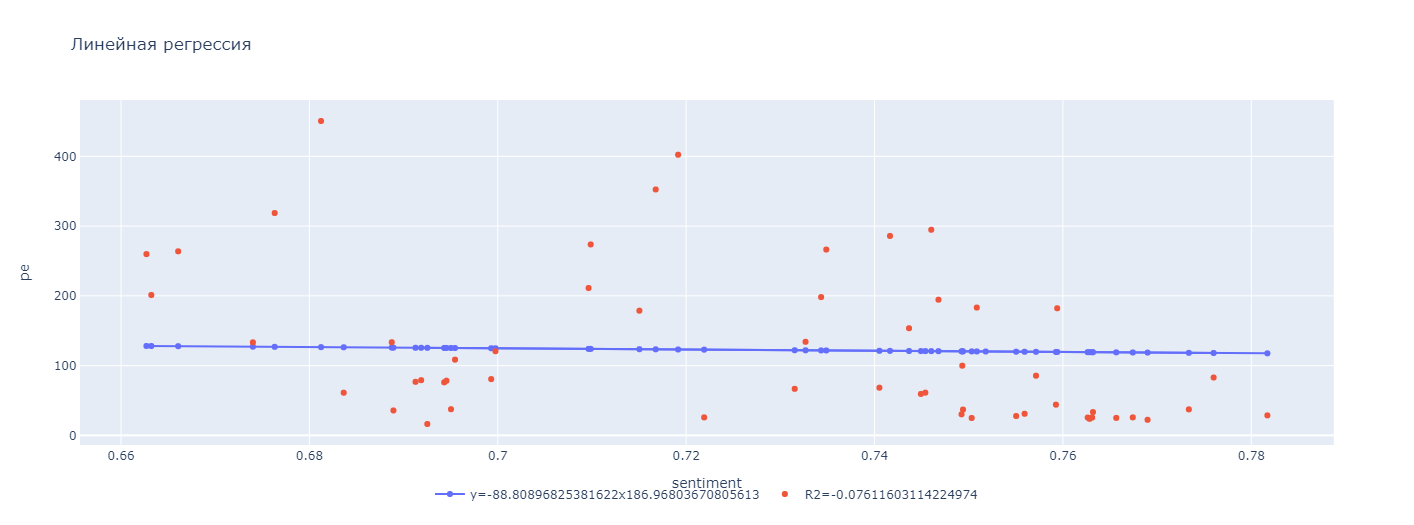

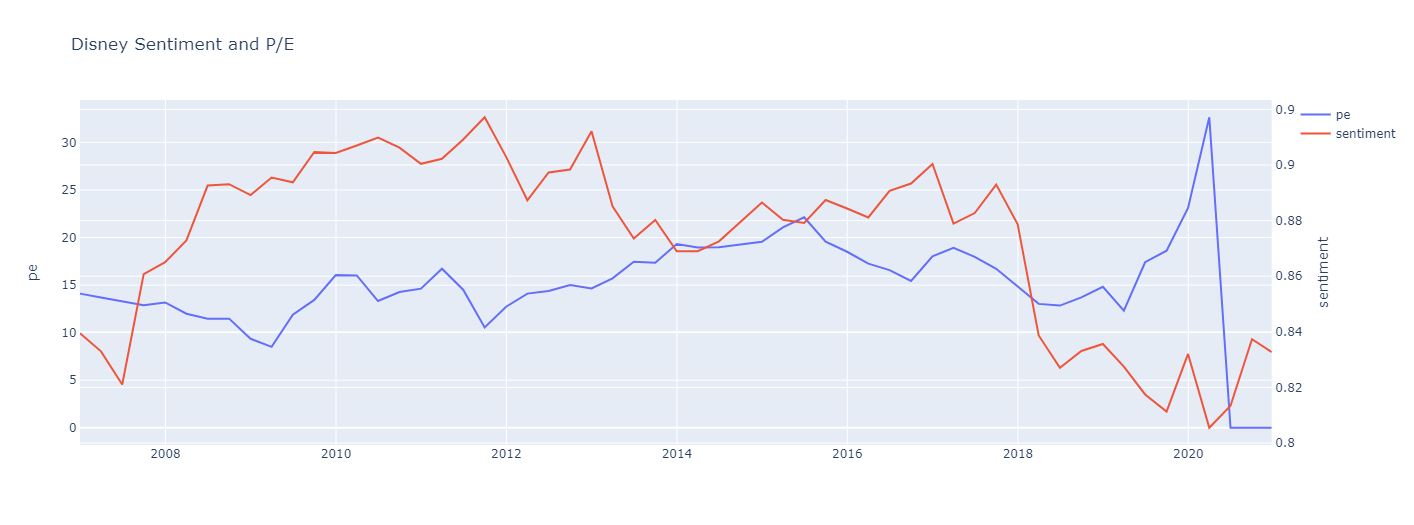

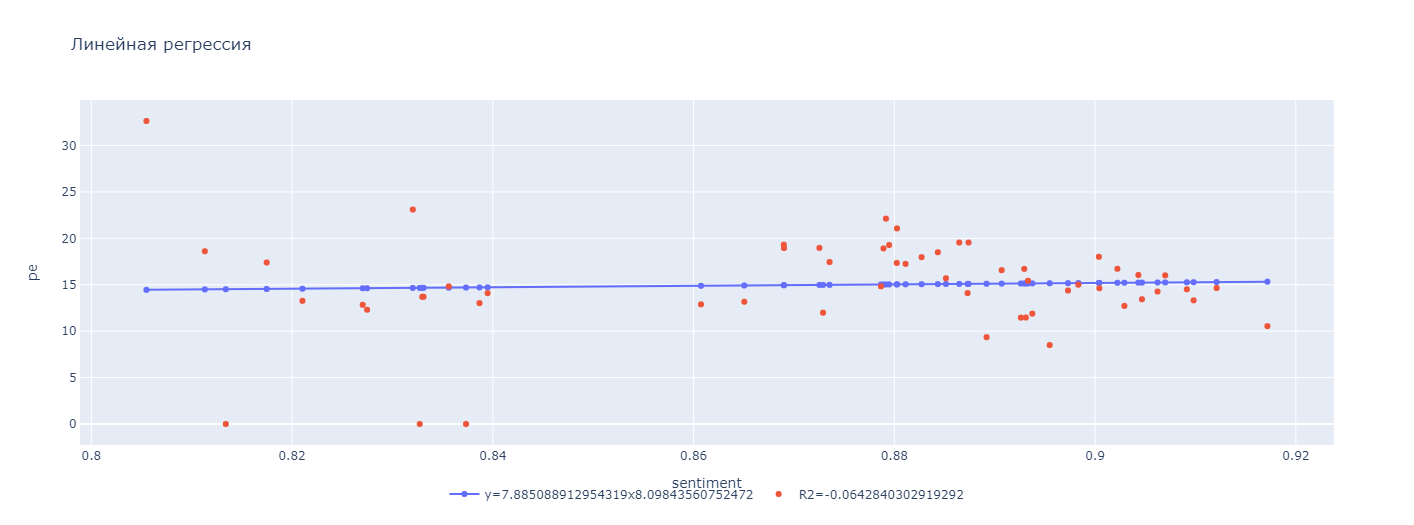

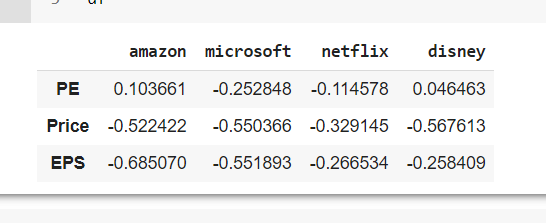